<a href="https://colab.research.google.com/github/httpdesti/Praktikum-KB/blob/main/posttest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POSTTEST 3
### Nama : Desti Yulianingsih
### NIM : 2209106059

#### 1. Data Cleaning
import semua library yang diperlukan dan cek missing value pada dataset.


In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sb = pd.read_csv('football-league.csv')
sb.isnull().sum()

,0
Country,0
League,0
Club,34
Player Names,0
Matches_Played,0
Substitution,0
Mins,0
Goals,0
xG,0
xG Per Avg Match,0


karena tidak ada missing value yang ditemukan, maka kita tidak perlu melakukan handling missing value. selanjutnya cek duplicate value yang ada pada dataset

In [5]:
duplicate = sb.duplicated().sum()
print(duplicate)

0


karena duplikat valuenya juga tidak ada maka selanjutnya kita cek outliernya.

<Axes: ylabel='Year'>

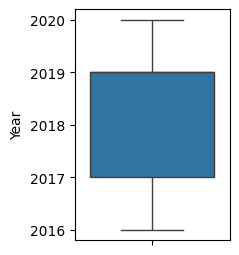

In [6]:
fig, ax = plt.subplots(figsize=(2,3)) #buat frame/figure
sns.boxplot(sb['Year'])

#### 2. Normalisasi dan Standarisasi
lakukan normalisasi pada kolom numerik, saya memilih kolom 'Year' untuk di-normalisasi. gunakan minmax scaler untuk normalisasi data.

In [7]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(sb.select_dtypes('int')))
normalized_data['Year'] = sb['Year']
print(normalized_data.head())
# sb.select_dtypes('int')

          0         1         2         3         4     5    6  Year
0  0.472222  0.615385  0.405060  0.257143  0.211823  0.18  0.0  2016
1  0.944444  0.000000  0.732175  0.400000  0.408867  0.39  0.0  2016
2  0.888889  0.038462  0.683874  0.742857  0.566502  0.55  0.0  2016
3  0.833333  0.115385  0.658830  0.314286  0.551724  0.40  0.0  2016
4  0.527778  0.384615  0.378482  0.314286  0.221675  0.21  0.0  2016


untuk standarisasi, saya juga memilih kolom 'Year'
import StandarScaler dari scikit-learn untuk standarisasi data, setelah itu buat objek StandarScaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(sb.select_dtypes('int')))
standardized_data['Year'] = sb['Year']

print(standardized_data.head())

          0         1         2         3         4         5         6  Year
0 -0.345862  3.329978 -0.247154 -0.131291 -0.463331 -0.511607 -1.729494  2016
1  1.398217 -0.840393  1.175207  0.705120  0.682304  0.772738 -1.729494  2016
2  1.193031 -0.579745  0.965186  2.712507  1.598811  1.751287 -1.729494  2016
3  0.987845 -0.058448  0.856287  0.203273  1.512889  0.833898 -1.729494  2016
4 -0.140677  1.766089 -0.362720  0.203273 -0.406049 -0.328129 -1.729494  2016


#### 3. Encoding kolom kategorikal
label-encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sb['League_encoded'] = label_encoder.fit_transform(sb['League'])
print(sb[['League', 'League_encoded']])

         League  League_encoded
0       La Liga              23
1       La Liga              23
2       La Liga              23
3       La Liga              23
4       La Liga              23
..          ...             ...
655  Eredivisie               2
656  Eredivisie               2
657  Eredivisie               2
658  Eredivisie               2
659  Eredivisie               2

[660 rows x 2 columns]


#### 4. Feature Enginneering
membuat 3 feature baru

1. Goal Conversion Rate, rasio antara jumlah gol yang dicetak dengan jumlah tembakan yang dilakukan oleh pemain

In [11]:
sb['Goal_conversion_rate'] = sb['Goals'] / sb['Year']
print(sb.head())

  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849     11   6.62              0.34     48        20                 2.47   
1  3129     16  11.86              0.36     88        41                 2.67   
2  2940     28  23.21              0.75    120        57                 3.88   
3  2842     13  14.06              0.47    117        42                 3.91   
4  1745     13  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  Leag

2. shooting accuracy,
mengukur akurasi tembakan seorang pemain, yaitu persentase tembakan yang tepat sasaran (on target) dari total tembakan.

In [13]:
sb['Shooting_Accuracy'] = sb['OnTarget'] / sb['Shots']
print(sb.head())

  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849     11   6.62              0.34     48        20                 2.47   
1  3129     16  11.86              0.36     88        41                 2.67   
2  2940     28  23.21              0.75    120        57                 3.88   
3  2842     13  14.06              0.47    117        42                 3.91   
4  1745     13  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  Leag

3. Average Goal per-Match, rata-rata gol yang dicetak oleh pemain dalam satu pertandingan.

In [15]:
sb['Avg_Goals_Per_Match'] = sb['Goals'] / sb['Matches_Played']
print(sb.head())

  Country   League   Club       Player Names  Matches_Played  Substitution   \
0   Spain  La Liga  (BET)    Juanmi Callejon              19             16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36              0   
2   Spain  La Liga  (ATL)        Luis Suarez              34              1   
3   Spain  La Liga  (CAR)       Ruben Castro              32              3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21             10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849     11   6.62              0.34     48        20                 2.47   
1  3129     16  11.86              0.36     88        41                 2.67   
2  2940     28  23.21              0.75    120        57                 3.88   
3  2842     13  14.06              0.47    117        42                 3.91   
4  1745     13  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  Leag

#### 5. Splitting data ke dalam data training & data testing
menggunakan fungsi train_test_split dari library sklearn
###### saya ingin memprediksi jumlah goal, jadi kita gunakan kolom-kolom lain sebagai fitur dan gunakan train_test_split untuk menentukan proporsi data training dan testing
###### X = fitur yang digunakan untuk prediksi selain target 'Goal'
###### y = target yang akan diprediksi 'Goal'
###### test.size = 0.2 =  20% data akan digunakan untuk testing, dan sisanya (80%) untuk training
###### random_state = 42 = menetapkan seed random supaya hasil splitting konsisten setiap kali kode dijalankan


In [16]:
from sklearn.model_selection import train_test_split

X = sb.drop(['Goals', 'Player Names'], axis = 1)
y = sb['Goals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Data Training X : ", X_train.shape)
print("Data Testing X : ", X_test.shape)
print("Data Training y : ", y_train.shape)
print("Data Testing y : ", y_test.shape)

Data Training X :  (528, 17)
Data Testing X :  (132, 17)
Data Training y :  (528,)
Data Testing y :  (132,)
